# 研究過程紀錄

In [1]:
!pip install selenium opencv-python pytesseract python-dotenv

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

sport_center_url = os.getenv("SPORT_CENTER_URL")
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")
slack_hook_url = os.getenv("SLACK_HOOK_URL")

In [4]:
from selenium import webdriver

driver = webdriver.Chrome('./chromedriver.exe')
driver.implicitly_wait(5)

driver.get(sport_center_url + '?module=login_page&files=login')

alert = driver.switch_to.alert
alert.accept()
alert = driver.switch_to.alert
alert.accept()

driver.find_element_by_id('ContentPlaceHolder1_loginid').send_keys(username)
driver.find_element_by_id('loginpw').send_keys(password)

In [3]:
captcha = driver.find_element_by_id('ContentPlaceHolder1_CaptchaImage')
imageBytes = captcha.screenshot_as_png

In [4]:
f = open('captcha.png', 'wb')
f.write(imageBytes)
f.close()

In [2]:
import cv2
from matplotlib import pyplot as plt

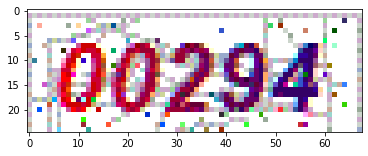

In [3]:
image = cv2.imread('captcha.png')
plt.imshow(image)

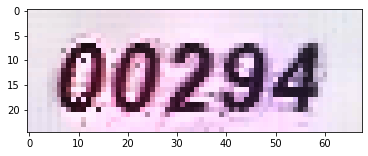

In [7]:
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 30, 30)
plt.imshow(denoised_image)

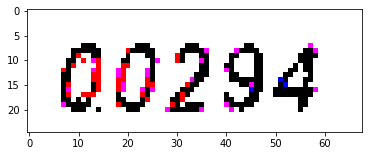

In [8]:
_, preprocessed_image = cv2.threshold(denoised_image, 65, 255, cv2.THRESH_BINARY)
plt.imshow(preprocessed_image) 

In [9]:
cv2.imwrite('output.png', preprocessed_image)

True

In [10]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
captcha_text = pytesseract.image_to_string('output.png').split('\n')[0]
captcha_text

'00294'

In [11]:
driver.find_element_by_id('ContentPlaceHolder1_Captcha_text').send_keys(captcha_text)
driver.find_element_by_id('login_but').click()

In [12]:
driver.get(sport_center_url + "?module=net_booking&files=booking_place&StepFlag=2&PT=1&D=2021/01/14&D2=3")

In [13]:
driver.find_element_by_css_selector("#ContentPlaceHolder1_Panel_Step2 > table > tbody > tr:nth-child(2) > td > table > tbody > tr:nth-child(6) > td:nth-child(4) > img").click()

In [14]:
alert = driver.switch_to.alert
alert.accept()

In [15]:
assert driver.find_element_by_css_selector("#ContentPlaceHolder1_Step3Info_lab > span:nth-child(1)").text == "預約成功"

In [16]:
import requests

requests.post(slack_hook_url, json={'text': "預約成功"  })

<Response [200]>

In [17]:
driver.close()